#Comparing the Performance of Various Machine Learning Models for Stock Price Prediction


Stock price forecasting is a challenging topic compared to other price forecasting cases. Scholars and experts from various fields have studied stock market price forecasts, noting that stocks exhibit random walking behavior with sudden rises and falls. Accurate stock market forecasting can greatly benefit managers, investors, and decision-makers in making informed investment choices. Machine learning techniques, utilizing historical data to identify patterns and predictive models, are commonly employed for stock price prediction.

# ✅ **Linear Regression** ✅

Linear regression is a statistical method that models the relationship between two variables using a linear equation. One variable is considered explanatory (X), and the other is dependent (Y). For example, it can be used to study how height (X) affects weight (Y) by estimating the best-fitting line through observed data. Linear regression is a common technique in data analysis, machine learning, and statistical modeling, providing insights into the direction and strength of the relationship between variables.

# **Import Libraries**

In [1]:
# import libraries
import numpy as np
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
import pandas as pd


# **Load Dataset into the Data Frame**

In [2]:
# input
symbol = 'TSLA'
start = '2010-01-01'
end = '2021-12-31'

dataset = pd.read_csv('../dataset/TSLA.csv')
dataset.sample(5)
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


# **Dataset Preprocessing**

In [3]:
dataset['Open_Close'] = (dataset['Open'] - dataset['Adj Close'])/dataset['Open']
dataset['High_Low'] = (dataset['High'] - dataset['Low'])/dataset['Low']
dataset['Increase_Decrease'] = np.where(dataset['Volume'].shift(-1) > dataset['Volume'],1,0)
dataset['Buy_Sell_on_Open'] = np.where(dataset['Open'].shift(-1) > dataset['Open'],1,0)
dataset['Buy_Sell'] = np.where(dataset['Adj Close'].shift(-1) > dataset['Adj Close'],1,0)
dataset['Returns'] = dataset['Adj Close'].pct_change()
dataset = dataset.dropna()
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Open_Close,High_Low,Increase_Decrease,Buy_Sell_on_Open,Buy_Sell,Returns
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100,0.075998,0.305579,0,0,0,-0.002511
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800,0.121600,0.278737,0,0,0,-0.078473
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800,0.165217,0.234634,1,0,0,-0.125683
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900,0.194500,0.263424,1,0,0,-0.160937
5,2010-07-07,16.400000,16.629999,14.980000,15.800000,15.800000,6921700,0.036585,0.110147,1,0,1,-0.019243


# **View Dataset**

In [4]:
# view dataset
dataset

,Date,Open,High,Low,Close,Adj Close,Volume,Open_Close,High_Low,Increase_Decrease,Buy_Sell_on_Open,Buy_Sell,Returns
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100,0.075998,0.305579,0,0,0,-0.002511
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800,0.121600,0.278737,0,0,0,-0.078473
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800,0.165217,0.234634,1,0,0,-0.125683
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900,0.194500,0.263424,1,0,0,-0.160937
5,2010-07-07,16.400000,16.629999,14.980000,15.800000,15.800000,6921700,0.036585,0.110147,1,0,1,-0.019243
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2411,2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500,0.002797,0.033561,1,1,1,0.015913
2412,2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500,-0.009206,0.039423,1,1,1,0.024854
2413,2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700,-0.013267,0.053204,0,1,1,0.102962
2414,2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300,-0.016516,0.032378,1,1,1,0.015231


# **Dataset Cleaning and Null Value Testing**

In [5]:
# view how many null values in each column
dataset.isnull().sum()

Date                 0
Open                 0
High                 0
Low                  0
Close                0
Adj Close            0
Volume               0
Open_Close           0
High_Low             0
Increase_Decrease    0
Buy_Sell_on_Open     0
Buy_Sell             0
Returns              0
dtype: int64

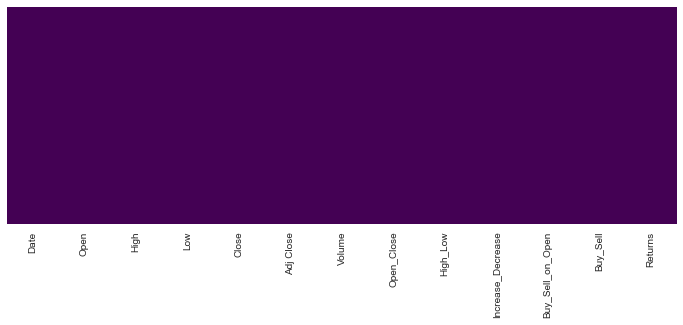

In [6]:
plt.figure(figsize=(12,4))
sns.heatmap(dataset.isnull(), yticklabels=False,cbar=False,cmap='viridis')
plt.savefig("Figure 1: Heatmap for Null Values")

# **Analyze the Dataset**

In [7]:
# view number of rows, number of columns
dataset.shape

(2415, 13)

In [8]:
# total number of records
dataset.size
print("Total number of records = ",dataset.size)

Total number of records =  31395


In [9]:
# view columns names
dataset.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Open_Close', 'High_Low', 'Increase_Decrease', 'Buy_Sell_on_Open',
       'Buy_Sell', 'Returns'],
      dtype='object')

In [10]:
# view data types of the columns
dataset.dtypes

Date                  object
Open                 float64
High                 float64
Low                  float64
Close                float64
Adj Close            float64
Volume                 int64
Open_Close           float64
High_Low             float64
Increase_Decrease      int32
Buy_Sell_on_Open       int32
Buy_Sell               int32
Returns              float64
dtype: object

In [11]:
# view dataset info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2415 entries, 1 to 2415
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               2415 non-null   object 
 1   Open               2415 non-null   float64
 2   High               2415 non-null   float64
 3   Low                2415 non-null   float64
 4   Close              2415 non-null   float64
 5   Adj Close          2415 non-null   float64
 6   Volume             2415 non-null   int64  
 7   Open_Close         2415 non-null   float64
 8   High_Low           2415 non-null   float64
 9   Increase_Decrease  2415 non-null   int32  
 10  Buy_Sell_on_Open   2415 non-null   int32  
 11  Buy_Sell           2415 non-null   int32  
 12  Returns            2415 non-null   float64
dtypes: float64(8), int32(3), int64(1), object(1)
memory usage: 235.8+ KB


In [12]:
# view the statistics per each column
dataset.describe()

,Open,High,Low,Close,Adj Close,Volume,Open_Close,High_Low,Increase_Decrease,Buy_Sell_on_Open,Buy_Sell,Returns
count,2415.000000,2415.000000,2415.000000,2415.000000,2415.000000,2.415000e+03,2415.000000,2415.000000,2415.000000,2415.000000,2415.000000,2415.000000
mean,186.340410,189.646373,182.985118,186.470944,186.470944,5.567259e+06,-0.000202,0.039937,0.469979,0.520497,0.511387,0.001975
std,118.715928,120.870941,116.833297,119.114759,119.114759,4.981607e+06,0.027068,0.024399,0.499201,0.499683,0.499974,0.032762
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05,-0.199346,0.009111,0.000000,0.000000,0.000000,-0.193274
25%,34.375000,34.930001,33.650000,34.400002,34.400002,1.897250e+06,-0.014394,0.024804,0.000000,0.000000,0.000000,-0.014178
50%,213.100006,216.750000,208.919998,212.960007,212.960007,4.577200e+06,0.000112,0.034274,0.000000,1.000000,1.000000,0.000870
75%,266.450012,270.935012,262.104995,266.779999,266.779999,7.360250e+06,0.014008,0.047548,1.000000,1.000000,1.000000,0.018115
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07,0.197535,0.305579,1.000000,1.000000,1.000000,0.243951


array([[<AxesSubplot:title={'center':'Open'}>,
        <AxesSubplot:title={'center':'High'}>,
        <AxesSubplot:title={'center':'Low'}>],
       [<AxesSubplot:title={'center':'Close'}>,
        <AxesSubplot:title={'center':'Adj Close'}>,
        <AxesSubplot:title={'center':'Volume'}>],
       [<AxesSubplot:title={'center':'Open_Close'}>,
        <AxesSubplot:title={'center':'High_Low'}>,
        <AxesSubplot:title={'center':'Increase_Decrease'}>],
       [<AxesSubplot:title={'center':'Buy_Sell_on_Open'}>,
        <AxesSubplot:title={'center':'Buy_Sell'}>,
        <AxesSubplot:title={'center':'Returns'}>]], dtype=object)

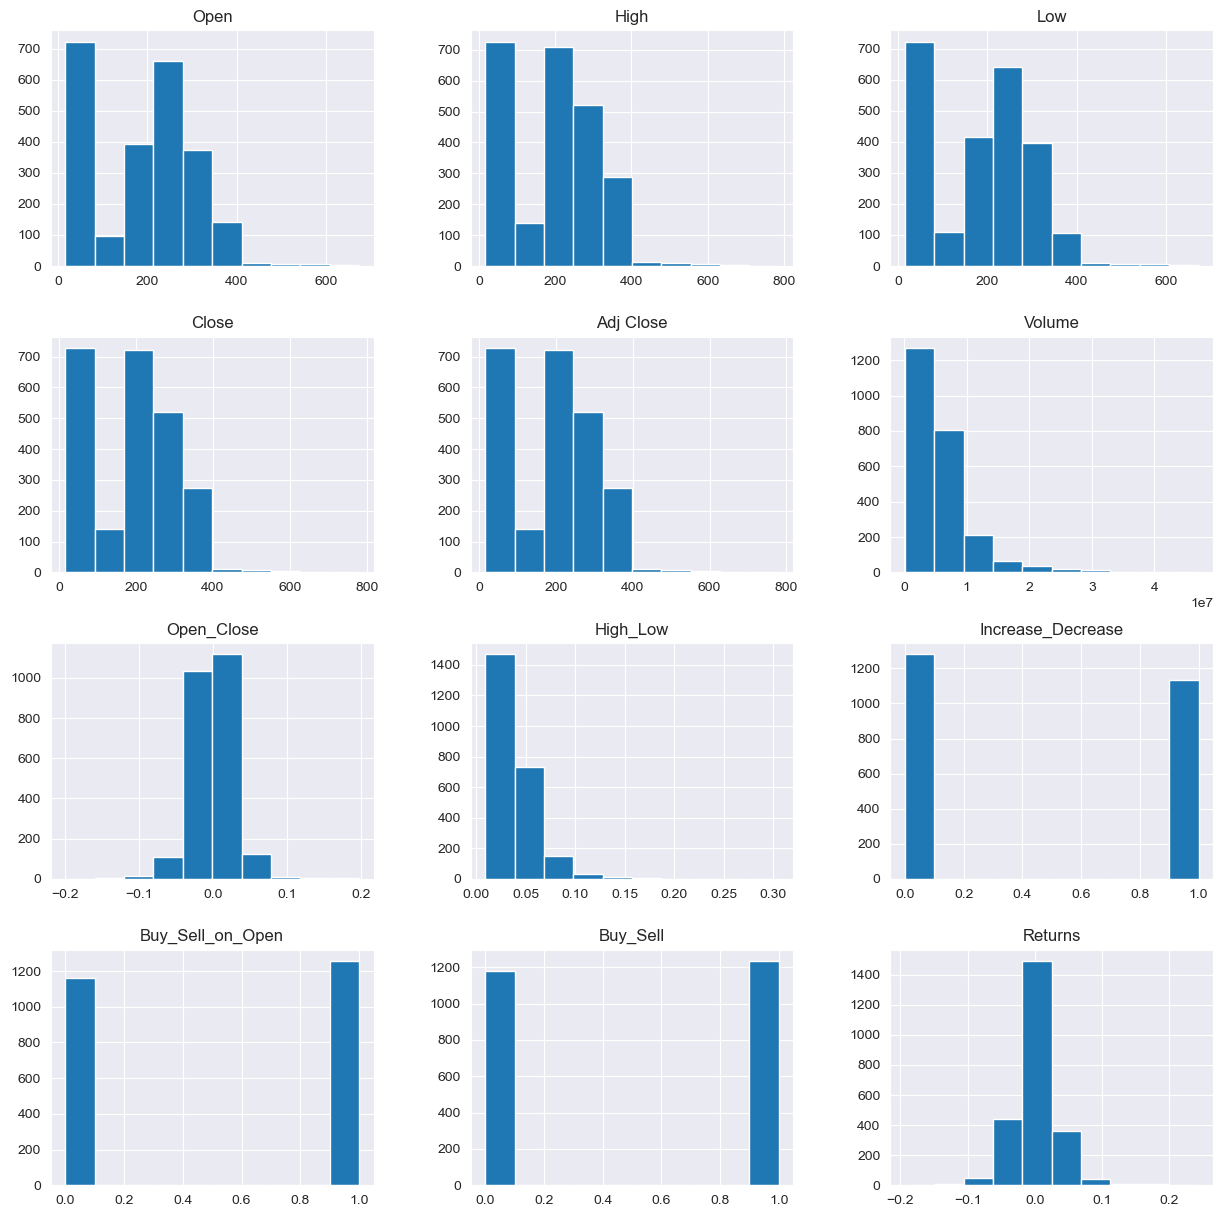

In [13]:
# view the histogram per each numerical column
dataset.hist(figsize=(15, 15))

<AxesSubplot:xlabel='Adj Close', ylabel='Density'>

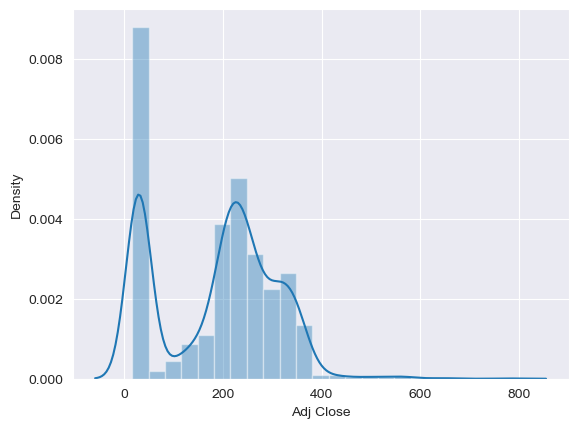

In [14]:
sns.distplot(dataset['Adj Close'])

<AxesSubplot:>

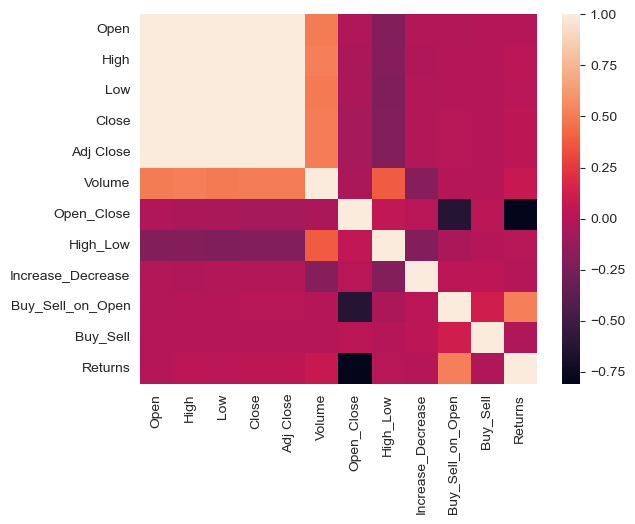

In [15]:
sns.heatmap(dataset.corr())

# **Define X and Y**

In [16]:
X = dataset[['Open', 'High', 'Low','Volume', 'Open_Close', 'High_Low', 'Returns']]
y = dataset['Adj Close']

# **Split Train Dataset and Test Dataset**

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                   test_size=0.4, random_state=101)

# **Dataset Traning and Model Traning**

In [18]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [19]:
print(lm.intercept_)

-0.002457765150296609


In [20]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns={'Coefficient'})
coeff_df

,Coefficient
Open,-3.929277e-01
High,8.053622e-01
Low,5.858372e-01
Volume,-3.526956e-08
Open_Close,-3.438376e+01
High_Low,-1.703959e+00
Returns,9.693157e+00


# **Comparison of Actual Values and Predicted Values**

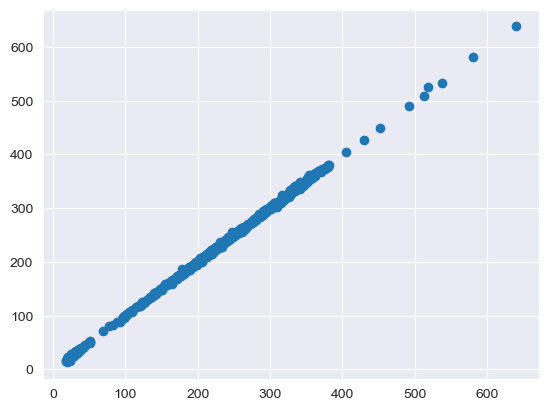

In [21]:
y_pred = lm.predict(X_test)
plt.scatter(y_test,y_pred)
plt.savefig("Figure: Comparison of Actual Values and Predictions Values")

In [22]:
df = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})  
print(df.head())
print(df.tail())

          Actual   Predicted
680    38.980000   39.102287
988   204.940002  206.315459
1542  225.610001  225.190852
1526  220.500000  221.659926
138    26.219999   25.162221
          Actual   Predicted
1911  354.309998  353.175627
1905  352.790009  353.611874
2019  308.899994  308.494148
172    24.950001   25.188364
721    76.760002   81.797848


<AxesSubplot:xlabel='Adj Close', ylabel='Density'>

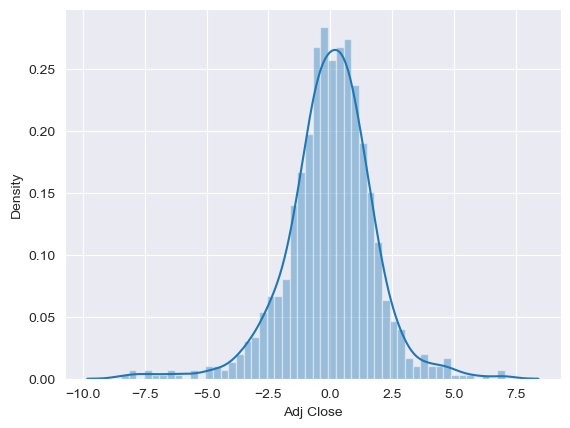

In [23]:
sns.distplot((y_test-y_pred),bins=50)

In [24]:
print(y_test.shape)
print(y_pred.shape)

(966,)
(966,)


In [25]:
lm_fit = lm.fit(X_train, y_train)
lm_scores = cross_val_score(lm_fit, X_train, y_train, cv = 5)

print("Mean cross validation score: {}".format(np.mean(lm_scores)))
print("Score without cv: {}".format(lm_fit.score(X_train, y_train)))

Mean cross validation score: 0.9997206683103567
Score without cv: 0.9997541900188301


# **Accuracy and Loss Function Values of the Model**

In [26]:
print('Mean_Absolute_Error(MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean_Squared_Error(MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root_Mean_Squared_Error(RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean_Absolute_Error(MAE): 1.2935425192761931
Mean_Squared_Error(MSE): 3.1874615481374535
Root_Mean_Squared_Error(RMSE): 1.7853463384277724


In [27]:
print("Accuracy score: {:.7f}".format(lm.score(X_test, y_test)))

Accuracy score: 0.9997676


In [28]:
print(dataset)


            Date        Open        High         Low       Close   Adj Close  \
1     2010-06-30   25.790001   30.420000   23.299999   23.830000   23.830000   
2     2010-07-01   25.000000   25.920000   20.270000   21.959999   21.959999   
3     2010-07-02   23.000000   23.100000   18.709999   19.200001   19.200001   
4     2010-07-06   20.000000   20.000000   15.830000   16.110001   16.110001   
5     2010-07-07   16.400000   16.629999   14.980000   15.800000   15.800000   
...          ...         ...         ...         ...         ...         ...   
2411  2020-01-28  568.489990  576.809998  558.080017  566.900024  566.900024   
2412  2020-01-29  575.690002  589.799988  567.429993  580.989990  580.989990   
2413  2020-01-30  632.419983  650.880005  618.000000  640.809998  640.809998   
2414  2020-01-31  640.000000  653.000000  632.520020  650.570007  650.570007   
2415  2020-02-03  673.690002  786.140015  673.520020  780.000000  780.000000   

        Volume  Open_Close  High_Low  I